In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start=start, end=end, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291536,16.414154,16.222811,16.368667,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387977,15.994636,15.357569,15.982274,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.600479,96.496264,93.240683,94.828770,26452900
2757,2022-12-15,90.521072,93.330007,89.756808,92.843657,28298800
2758,2022-12-16,90.183609,91.066983,89.339938,90.521074,48485500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

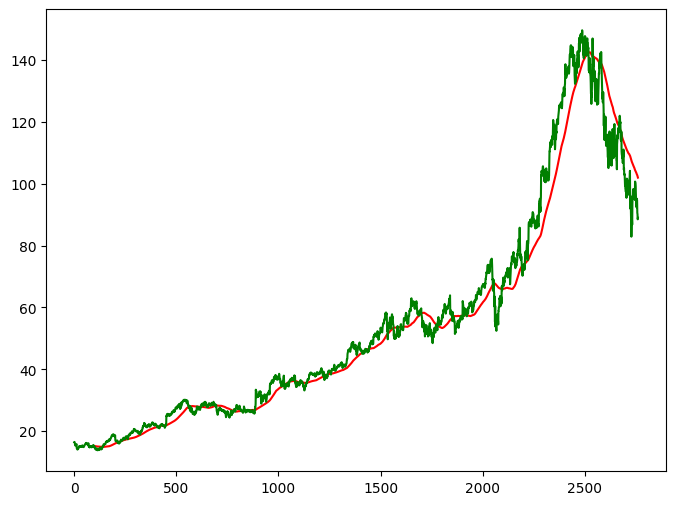

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

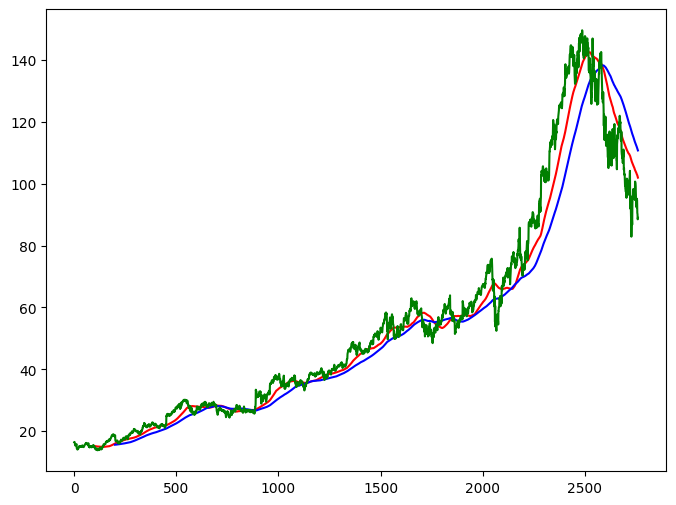

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2208

In [13]:
data_test.shape[0]

553

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential()

model.add(Input(shape=(60,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0249
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 5.4479e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 4.8130e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 5.0864e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.9294e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.3880e-04
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 4.0223e-04
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 3.5285e-04
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.5562e-04
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 4.1293e-04
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 3.4625e-04
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.4224e-04
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.1250e-04
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 3.4159e-04
Epoch 15/50
66/66 ━

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

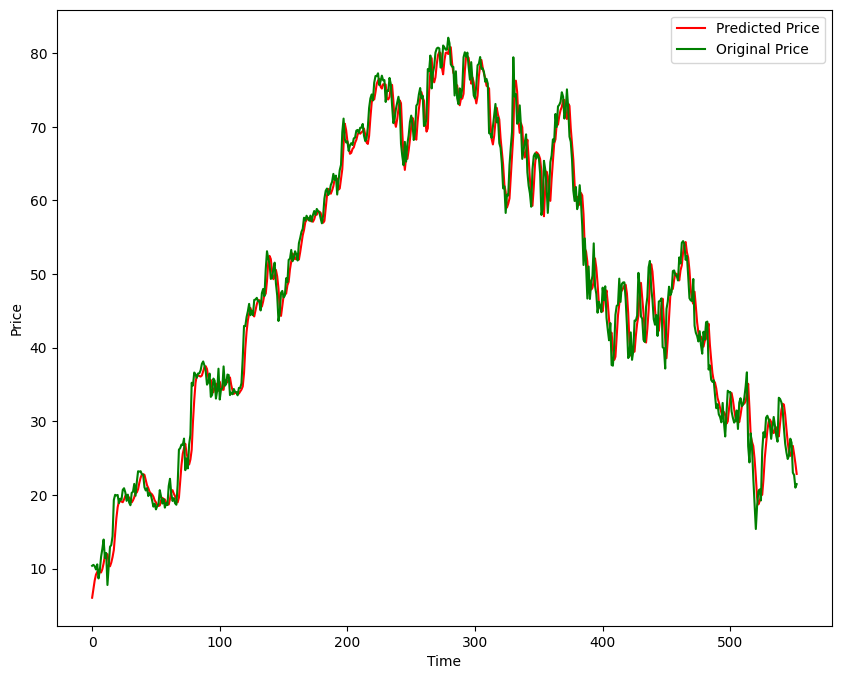

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')